# Chicago Crashes: Phase 3 Project

### Jesse Markowitz working notebook

## Stakeholders & Main Problem

Our stakeholder will be the City of Chicago. We'll focus on identifying the factors that most contribute to an increasing severity of crashes (fatalities, serious injury). 

We'll look closely at the columns associated with fatalities and injuries to create targets for this multi-class problem.

## Import datasets & poke around

Datasets located at:
 - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
 - https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3
 - https://data.cityofchicago.org/Transportation/Traffic-Crashes-People/u6pd-qa9d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crashes_df = pd.read_csv('./data/Traffic_Crashes_-_Crashes.csv')
people_df = pd.read_csv('./data/Traffic_Crashes_-_People.csv')
# vehicles_df = pd.read_csv('./data/Traffic_Crashes_-_Vehicles.csv')

/Users/jessemarkowitz/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/jessemarkowitz/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crashes_df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,JC343143,NaN,07/10/2019 05:56:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,17,4,7,41.919664,-87.773288,POINT (-87.773287883007 41.919663832993)
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,JD292400,NaN,07/10/2020 10:25:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,3.0,0.0,10,6,7,41.773456,-87.585022,POINT (-87.585022352022 41.773455972008)
3,f8960f698e870ebdc60b521b2a141a5395556bc3704191...,JD293602,NaN,07/11/2020 01:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,3.0,0.0,1,7,7,41.802119,-87.622115,POINT (-87.622114914961 41.802118543011)
4,8eaa2678d1a127804ee9b8c35ddf7d63d913c14eda61d6...,JD290451,NaN,07/08/2020 02:00:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,14,4,7,NaN,NaN,NaN


In [4]:
# From Angie: create a df to show % of missing values from another df:

# percent_missing = df.isnull().sum() * 100 / len(df)
# missing_value_df = pd.DataFrame({'column_name': df.columns,
#                                  'percent_missing': percent_missing})

# pd.set_option('display.max_rows', None)
# missing_value_df

In [5]:
crashes_df.isna().mean()

CRASH_RECORD_ID                  0.000000
RD_NO                            0.008486
CRASH_DATE_EST_I                 0.924181
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
LANE_CNT                         0.632318
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.024997
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.773254
NOT_RIGHT_OF_WAY_I               0.952689
HIT_AND_RUN_I                    0.698892
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0

In [6]:
crashes_df.loc[crashes_df.PRIM_CONTRIBUTORY_CAUSE == 'UNABLE TO DETERMINE'].NUM_UNITS.value_counts()

2.0     178933
1.0      11661
3.0       9474
4.0       1856
5.0        446
6.0        102
7.0         40
8.0         10
9.0          9
14.0         2
11.0         1
12.0         1
Name: NUM_UNITS, dtype: int64

In [7]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,JC451435,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,JD208731,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,HY484534,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,HY484750,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,HY484778,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [8]:
people_df.isna().mean()

PERSON_ID                0.000000
PERSON_TYPE              0.000000
CRASH_RECORD_ID          0.000000
RD_NO                    0.008475
VEHICLE_ID               0.019737
CRASH_DATE               0.000000
SEAT_NO                  0.795515
CITY                     0.264286
STATE                    0.255537
ZIPCODE                  0.328293
SEX                      0.015122
AGE                      0.287098
DRIVERS_LICENSE_STATE    0.409957
DRIVERS_LICENSE_CLASS    0.491509
SAFETY_EQUIPMENT         0.002918
AIRBAG_DEPLOYED          0.018905
EJECTION                 0.012161
INJURY_CLASSIFICATION    0.000496
HOSPITAL                 0.820056
EMS_AGENCY               0.886213
EMS_RUN_NO               0.981366
DRIVER_ACTION            0.206386
DRIVER_VISION            0.206662
PHYSICAL_CONDITION       0.205814
PEDPEDAL_ACTION          0.981416
PEDPEDAL_VISIBILITY      0.981456
PEDPEDAL_LOCATION        0.981417
BAC_RESULT               0.205471
BAC_RESULT VALUE         0.998735
CELL_PHONE_USE

In [9]:
people_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

In [10]:
# vehicles_df.head()

In [11]:
# vehicles_df.isna().mean()

## EDA

**Crashes:**

For purposes of EDA, we drop columns for which the distribution isn't relevant/informative.

In [12]:
crashes_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [13]:
crashes_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,541142.000000,1.989680e+05,541142.000000,541137.000000,541133.000000,540030.000000,540030.000000,540030.000000,540030.000000,540030.000000,540030.000000,540030.0,541142.000000,541142.000000,541142.000000,538026.000000,538026.000000
mean,28.311768,1.333232e+01,3664.599116,1238.230646,2.033955,0.180671,0.001094,0.019730,0.101009,0.058837,2.019149,0.0,13.249556,4.127115,6.621290,41.854746,-87.672871
std,6.414913,2.961906e+03,2909.611349,706.865005,0.447292,0.552669,0.035858,0.164441,0.410387,0.311525,1.168443,0.0,5.518619,1.978387,3.373203,0.338869,0.689157
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.935877
25%,30.000000,2.000000e+00,1217.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781544,-87.721205
50%,30.000000,2.000000e+00,3199.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.875126,-87.673362
75%,30.000000,4.000000e+00,5599.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.923972,-87.632793
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [14]:
crashes_df.INJURIES_UNKNOWN.value_counts()

0.0    540030
Name: INJURIES_UNKNOWN, dtype: int64

In [15]:
crashes_eda = crashes_df.drop(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 
                               'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
                               'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'INJURIES_UNKNOWN', 
                               'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1)

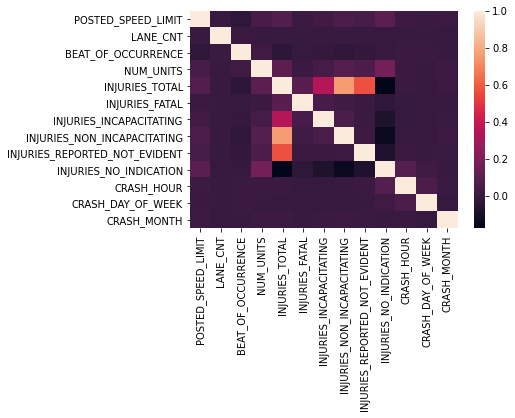

In [16]:
# Are certain factors correlated with severity of injuries?
sns.heatmap(crashes_eda.corr());

Looks like there aren't any standout features that correlate strongly (or at all!) with any count of injuries (of any severity). Surprising...

In [17]:
crashes_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541142 entries, 0 to 541141
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   POSTED_SPEED_LIMIT             541142 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE         541142 non-null  object 
 2   DEVICE_CONDITION               541142 non-null  object 
 3   WEATHER_CONDITION              541142 non-null  object 
 4   LIGHTING_CONDITION             541142 non-null  object 
 5   FIRST_CRASH_TYPE               541142 non-null  object 
 6   TRAFFICWAY_TYPE                541142 non-null  object 
 7   LANE_CNT                       198968 non-null  float64
 8   ALIGNMENT                      541142 non-null  object 
 9   ROADWAY_SURFACE_COND           541142 non-null  object 
 10  ROAD_DEFECT                    541142 non-null  object 
 11  CRASH_TYPE                     541142 non-null  object 
 12  INTERSECTION_RELATED_I        

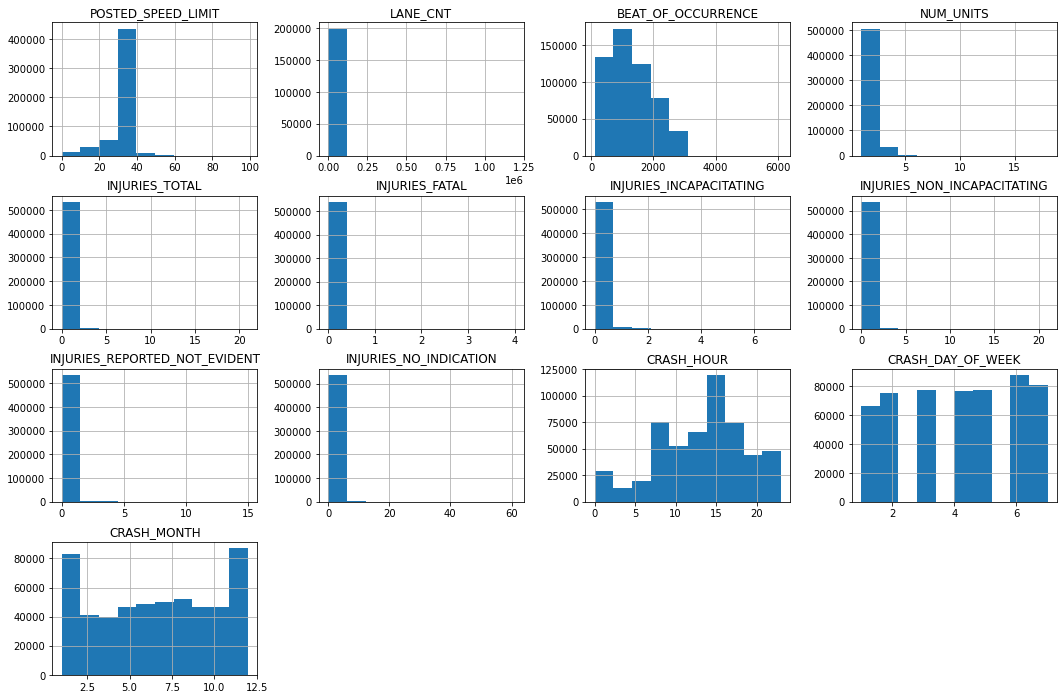

In [18]:
crashes_eda.hist(figsize=(18, 12));

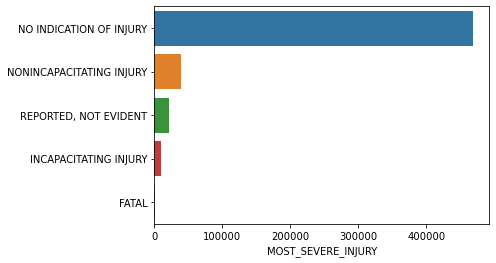

In [19]:
sns.barplot(y=crashes_eda.MOST_SEVERE_INJURY.value_counts().index, x=crashes_eda.MOST_SEVERE_INJURY.value_counts(),
           orient='h');

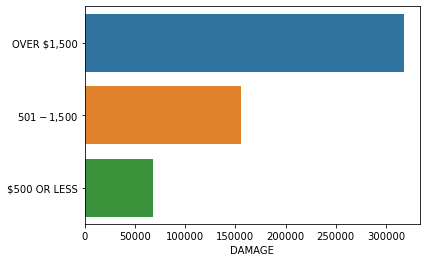

In [20]:
sns.barplot(y=crashes_eda.DAMAGE.value_counts().index, x=crashes_eda.DAMAGE.value_counts(),
           orient='h');

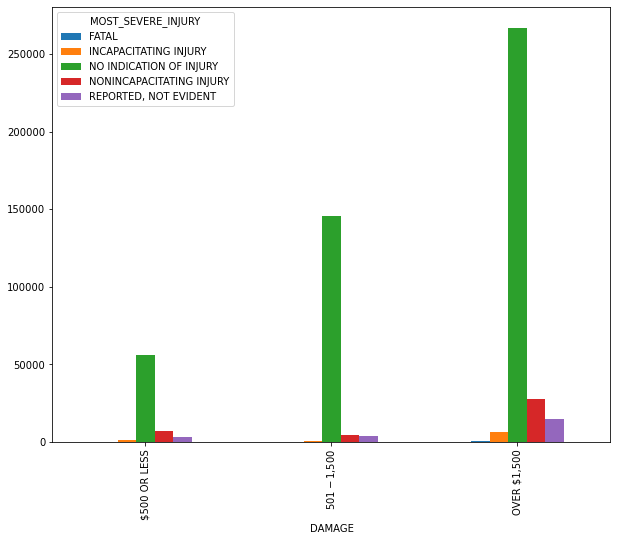

In [21]:
pd.crosstab(crashes_eda.DAMAGE, crashes_eda.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

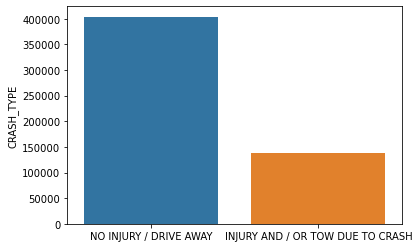

In [22]:
sns.barplot(x=crashes_eda.CRASH_TYPE.value_counts().index, y=crashes_eda.CRASH_TYPE.value_counts());

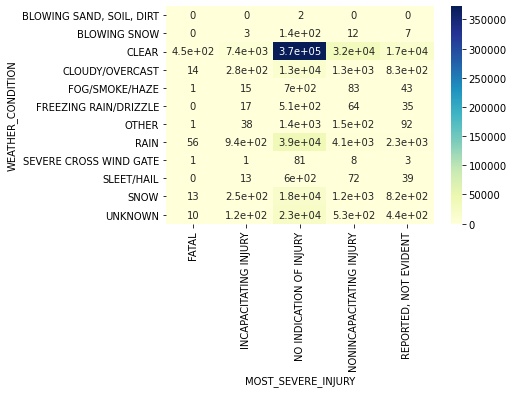

In [23]:
sns.heatmap(pd.crosstab(crashes_eda.WEATHER_CONDITION, 
                        crashes_eda.MOST_SEVERE_INJURY), 
            annot=True, cmap="YlGnBu");

**People:**

Once again, dropping irrelevant/uninformative columns.

In [24]:
people_df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.172146e+06,244512.000000,852450.000000,1513.000000
mean,5.585351e+05,4.161947,37.809891,0.168156
std,3.217621e+05,2.186146,17.108989,0.101872
min,2.000000e+00,1.000000,-177.000000,0.000000
25%,2.814092e+05,3.000000,25.000000,0.120000
50%,5.577685e+05,3.000000,35.000000,0.170000
75%,8.340698e+05,6.000000,50.000000,0.220000
max,1.121167e+06,12.000000,110.000000,1.000000


In [25]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1195747 non-null  object 
 1   PERSON_TYPE            1195747 non-null  object 
 2   CRASH_RECORD_ID        1195747 non-null  object 
 3   RD_NO                  1185613 non-null  object 
 4   VEHICLE_ID             1172146 non-null  float64
 5   CRASH_DATE             1195747 non-null  object 
 6   SEAT_NO                244512 non-null   float64
 7   CITY                   879728 non-null   object 
 8   STATE                  890189 non-null   object 
 9   ZIPCODE                803192 non-null   object 
 10  SEX                    1177665 non-null  object 
 11  AGE                    852450 non-null   float64
 12  DRIVERS_LICENSE_STATE  705542 non-null   object 
 13  DRIVERS_LICENSE_CLASS  608027 non-null   object 
 14  SAFETY_EQUIPMENT  

In [26]:
people_eda = people_df.drop(['PERSON_ID', 'RD_NO', 'CRASH_RECORD_ID', 'HOSPITAL',
                             'EMS_AGENCY', 'EMS_RUN_NO'], axis=1)

In [27]:
people_eda.BAC_RESULT.value_counts()

TEST NOT OFFERED                   935453
TEST REFUSED                        10368
TEST PERFORMED, RESULTS UNKNOWN      2422
TEST TAKEN                           1813
Name: BAC_RESULT, dtype: int64

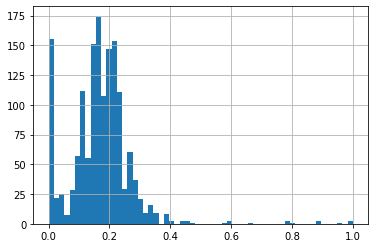

In [28]:
people_eda['BAC_RESULT VALUE'].hist(bins='auto');

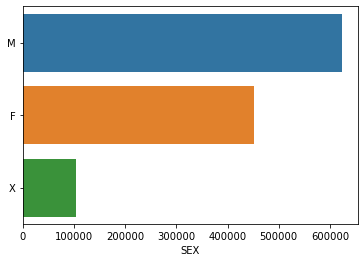

In [29]:
sns.barplot(y=people_eda.SEX.value_counts().index, x=people_eda.SEX.value_counts(),
           orient='h');

What's with ages less than 0???

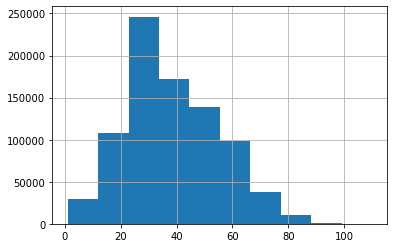

In [30]:
people_eda[people_eda['AGE'] > 0]['AGE'].hist();

In [31]:
people_eda['AGE_BINS'] = pd.cut(x=people_eda['AGE'], bins=[16, 19, 29, 39, 49, 59, 69, 79, 89, 99])

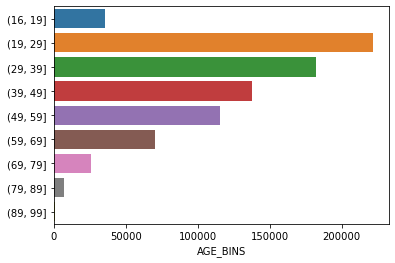

In [32]:
sns.barplot(y=people_eda.AGE_BINS.value_counts().index, x=people_eda.AGE_BINS.value_counts(),
           orient='h');

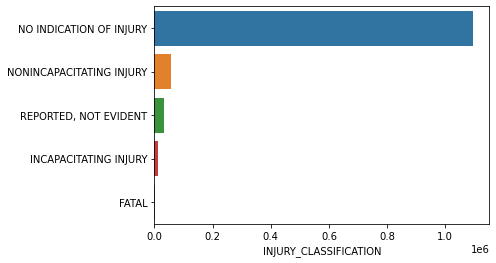

In [33]:
sns.barplot(y=people_eda.INJURY_CLASSIFICATION.value_counts().index, x=people_eda.INJURY_CLASSIFICATION.value_counts(),
           orient='h');

In [34]:
pd.crosstab(people_eda.SEX, people_eda.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,166,4640,403662,26255,16890
M,477,6003,573458,28189,14724
X,4,57,102744,171,93


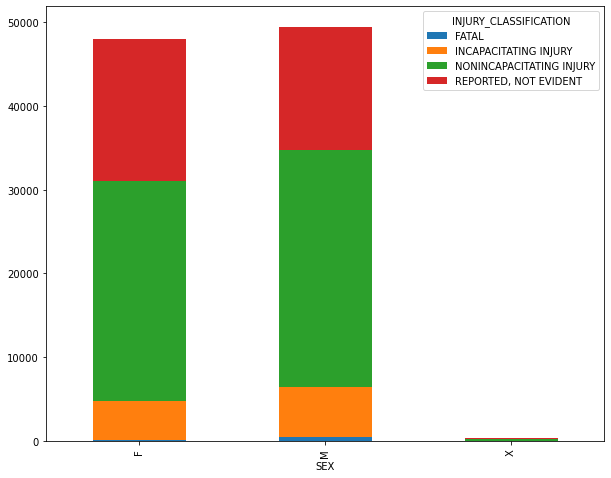

In [35]:
ct = pd.crosstab(people_eda.SEX, people_eda.INJURY_CLASSIFICATION).drop('NO INDICATION OF INJURY', axis=1)
ct.plot.bar(stacked=True, figsize=(10, 8));

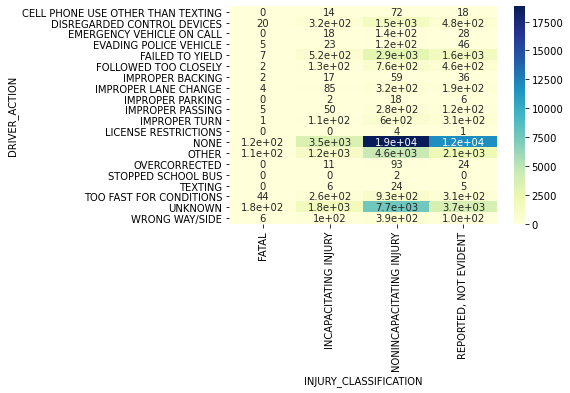

In [36]:
sns.heatmap(pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION).drop('NO INDICATION OF INJURY', axis=1),
            annot=True, cmap="YlGnBu");

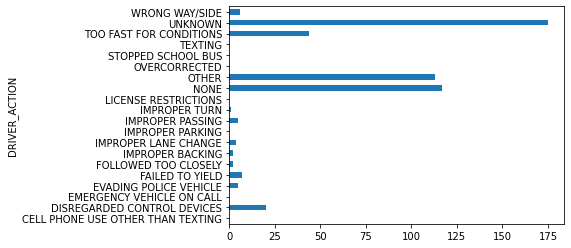

In [37]:
pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION)['FATAL'].plot.barh();

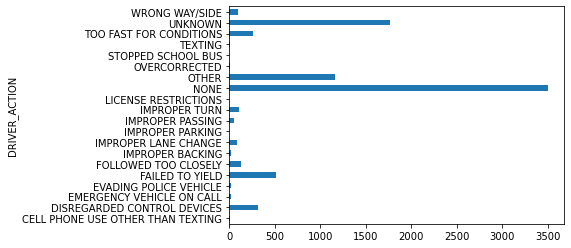

In [38]:
pd.crosstab(people_eda.DRIVER_ACTION, people_eda.INJURY_CLASSIFICATION)['INCAPACITATING INJURY'].plot.barh();

## Dropping columns/basic cleaning

####  First with `.isna().mean()`>80%

In [39]:
def dropna_columns(df, threshold=.8):
    '''
    Drop columns from a Pandas DataFrame in which more than a certain
    percentage (default=80%) of their rows are null/NaN.
    '''
    return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)

In [40]:
crashes_dropped_df = dropna_columns(crashes_df)
# vehicles_dropped_df = dropna_columns(vehicles_df)
people_dropped_df = dropna_columns(people_df)

In [41]:
crashes_dropped_df.shape

(541142, 41)

In [42]:
# vehicles_dropped_df.shape

In [43]:
people_dropped_df.shape

(1195747, 22)

In [44]:
crashes_dropped_df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [45]:
# vehicles_dropped_df.columns

In [46]:
people_dropped_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

In [47]:
people_dropped_df.SEAT_NO.value_counts()

3.0     118468
6.0      41772
4.0      32990
5.0      11585
1.0      10461
2.0       9784
12.0      6193
7.0       5581
10.0      5323
11.0      2081
8.0        274
Name: SEAT_NO, dtype: int64

####  Next by content we don't want/need

In [48]:
people_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195747 entries, 0 to 1195746
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1195747 non-null  object 
 1   PERSON_TYPE            1195747 non-null  object 
 2   CRASH_RECORD_ID        1195747 non-null  object 
 3   RD_NO                  1185613 non-null  object 
 4   VEHICLE_ID             1172146 non-null  float64
 5   CRASH_DATE             1195747 non-null  object 
 6   SEAT_NO                244512 non-null   float64
 7   CITY                   879728 non-null   object 
 8   STATE                  890189 non-null   object 
 9   ZIPCODE                803192 non-null   object 
 10  SEX                    1177665 non-null  object 
 11  AGE                    852450 non-null   float64
 12  DRIVERS_LICENSE_STATE  705542 non-null   object 
 13  DRIVERS_LICENSE_CLASS  608027 non-null   object 
 14  SAFETY_EQUIPMENT  

**Columns to drop:**

Crashes:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `REPORT_TYPE` not relevant to conditions in a crash
 - `CRASH_DATE` (redundant w/`people_df`)
 - `DATE_POLICE_NOTIFIED`
 - `STREET_NO`, `STREET_DIRECTION`, `STREET_NAME` are all location related; just use lat/long
 - All the `INJURIES_` columns--colinearity issues w/individual injury data

Vehicles:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `CRASH_DATE` (redundant w/`crashes_df`)
 - `UNIT_NO` is redundant (count of num vehicles in crash)
 - `AREA_01_I` is ??? Totally unclear what this is
 
People:
 - `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/`CRASH_RECORD_ID`
 - `CITY` and `ZIPCODE`; just use `STATE` to determine driver residence

In [49]:
crashes_cols_to_drop = ['CRASH_DATE', 'RD_NO', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_DIRECTION', 
                        'STREET_NAME', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
                        'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                        'INJURIES_UNKNOWN', 'MOST_SEVERE_INJURY']
# vehicles_cols_to_drop = ['RD_NO', 'CRASH_DATE', 'UNIT_NO', 'AREA_01_I']
people_cols_to_drop = ['RD_NO', 'CITY', 'ZIPCODE']

In [50]:
crashes_dropped_df = crashes_dropped_df.drop(crashes_cols_to_drop, axis=1)
# vehicles_dropped_df = vehicles_dropped_df.drop(vehicles_cols_to_drop, axis=1)
people_dropped_df = people_dropped_df.drop(people_cols_to_drop, axis=1)

In [51]:
crashes_dropped_df.shape

(541142, 26)

In [52]:
# vehicles_dropped_df.shape

In [53]:
people_dropped_df.shape

(1195747, 19)

## First Simple Model--DO NOT RUN!

Older version

### Create a `TARGET` columns

To create our FSM, we'll modify the `MOST_SEVERE_INJURY` column to create a `TARGET` column:
 - 0 = `NO INDICATION OF INJURY`, `NONINCAPACITATING INJURY`, `REPORTED, NOT EVIDENT`
 - 1 = `INCAPACITATING INJURY`, `FATAL`

In [54]:
# crashes_dropped_df.MOST_SEVERE_INJURY.value_counts()

In [55]:
# crashes_dropped_df['TARGET'] = crashes_dropped_df['MOST_SEVERE_INJURY'].map({'NO INDICATION OF INJURY': 0,
#                                                                               'NONINCAPACITATING INJURY': 0,
#                                                                               'REPORTED, NOT EVIDENT': 0,
#                                                                               'INCAPACITATING INJURY': 1,
#                                                                               'FATAL': 1})

In [56]:
# crashes_dropped_df.TARGET.value_counts()

In [57]:
# crashes_dropped_df.info()

### Apply a dummy model 

In [58]:
# from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import classification_report

In [59]:
# cols_to_drop = ['TARGET', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 
#                 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 
#                 'INJURIES_UNKNOWN', 'CRASH_RECORD_ID', 'CRASH_DATE', 'LATITUDE', 'LONGITUDE', 'LOCATION']

# X = crashes_dropped_df.drop(cols_to_drop, axis=1)
# y = crashes_dropped_df['TARGET']

# y.fillna(value=0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
# fsm = DummyClassifier(strategy='most_frequent', random_state=42)
# fsm.fit(X_train, y_train)
# y_train_preds = fsm.predict(X_train)
# y_test_preds = fsm.predict(X_test)

In [61]:
# print(classification_report(y_train, y_train_preds))

## Merging all the data into one dataframe

Since we are focusing on predicting individual outcomes in crashes, we will merge on `people_dropped_df` in a left join with `crashes_dropped_df` and `vehicles_dropped_df`. This will allow us to create a `TARGET` column based on the injury that each individual person incurred during the crash.

In [54]:
people_crashes_df = people_dropped_df.merge(crashes_dropped_df, on='CRASH_RECORD_ID', how='left')

In [55]:
people_crashes_df.shape

(1195747, 44)

In [56]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [57]:
people_crashes_df.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     1096283
NONINCAPACITATING INJURY      55296
REPORTED, NOT EVIDENT         32092
INCAPACITATING INJURY         10827
FATAL                           656
Name: INJURY_CLASSIFICATION, dtype: int64

In [58]:
sex_incapac_fatal = pd.crosstab(people_crashes_df.SEX, people_crashes_df.INJURY_CLASSIFICATION)[:2][['FATAL', 'INCAPACITATING INJURY']]

In [59]:
sex_incapac_fatal

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY
SEX,,
F,166,4640
M,477,6003


In [60]:
sex_incapac_fatal_percent = sex_incapac_fatal.copy()

In [61]:
sex_incapac_fatal_percent['FATAL']

SEX
F    166
M    477
Name: FATAL, dtype: int64

In [62]:
sex_incapac_fatal_percent['FATAL'] = sex_incapac_fatal['FATAL'].apply(lambda x: x/sex_incapac_fatal['FATAL'].sum())
sex_incapac_fatal_percent['INCAPACITATING INJURY'] = sex_incapac_fatal['INCAPACITATING INJURY'].apply(lambda x: x/sex_incapac_fatal['INCAPACITATING INJURY'].sum())

In [63]:
sex_incapac_fatal_percent.T

SEX,F,M
INJURY_CLASSIFICATION,,
FATAL,0.258165,0.741835
INCAPACITATING INJURY,0.435967,0.564033


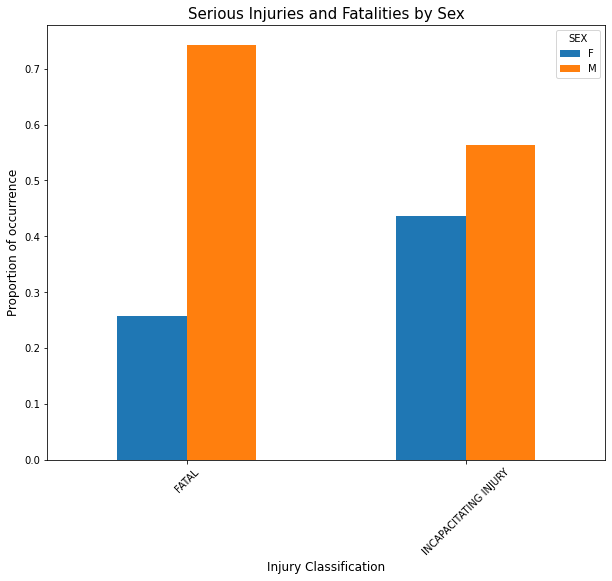

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
sex_incapac_fatal_percent.T.plot.bar(ax=ax)
plt.title('Serious Injuries and Fatalities by Sex', size=15)
plt.ylabel('Proportion of occurrence', size=12)
plt.xlabel('Injury Classification', size=12)
plt.xticks(rotation = 45);

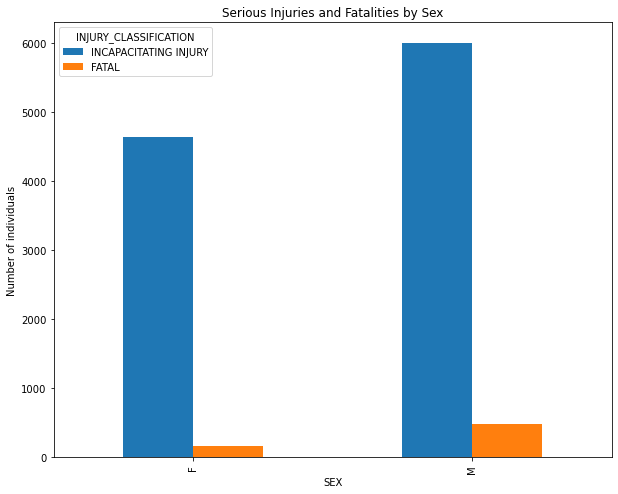

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = pd.crosstab(people_crashes_df.SEX, 
                 people_crashes_df.INJURY_CLASSIFICATION)[:2][['INCAPACITATING INJURY', 'FATAL']].plot.bar(ax=ax)
plt.title('Serious Injuries and Fatalities by Sex')
plt.ylabel('Number of individuals');

### Create target column

In [66]:
people_crashes_df['TARGET'] = people_crashes_df['INJURY_CLASSIFICATION'].map({np.NaN: 0, 
                                                                              'NO INDICATION OF INJURY': 0, 
                                                                              'NONINCAPACITATING INJURY': 1,
                                                                              'REPORTED, NOT EVIDENT': 1,
                                                                              'INCAPACITATING INJURY': 2,
                                                                              'FATAL': 3})
people_crashes_df['TARGET'].value_counts()

0    1096876
1      87388
2      10827
3        656
Name: TARGET, dtype: int64

**Make a `CRASH_YEAR` columns:**

In [67]:
people_crashes_df['CRASH_YEAR'] = pd.to_datetime(people_crashes_df['CRASH_DATE']).dt.year

In [68]:
people_crashes_df['CRASH_YEAR'].value_counts()

2018    265694
2019    263972
2020    202084
2017    185328
2021    161704
2016     96020
2015     20931
2014        11
2013         3
Name: CRASH_YEAR, dtype: int64

In [69]:
people_crashes_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'STATE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'TARGET',
       'CRASH_YEAR'],
      dtype='object')

### Split the data

In [70]:
from sklearn.model_selection import train_test_split

Drop some specific rows:

In [71]:
people_crashes_df.shape

(1195747, 46)

In [72]:
# Drop nulls from BEAT_OF_OCCURRENCE
people_crashes_df.dropna(subset = ['BEAT_OF_OCCURRENCE'], inplace=True)

# Drop ages < 0 and ages = 0 for DRIVER
people_crashes_df.loc[people_crashes_df.AGE < 0, 'AGE'] = np.nan
people_crashes_df.loc[(people_crashes_df.AGE == 0) & (people_crashes_df.PERSON_TYPE == 'DRIVER'), 'AGE'] = np.nan
people_crashes_df.dropna(subset = ['AGE'], inplace=True)

# Drop POSTED_SPEED_LIMIT = 0 or not divisible by 5
people_crashes_df.loc[people_crashes_df.POSTED_SPEED_LIMIT == 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.loc[(people_crashes_df.POSTED_SPEED_LIMIT % 5) != 0, 'POSTED_SPEED_LIMIT'] = np.nan
people_crashes_df.dropna(subset = ['POSTED_SPEED_LIMIT'], inplace=True)

In [73]:
people_crashes_df.shape

(836073, 46)

In [74]:
X = people_crashes_df.drop(['PERSON_ID', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'LANE_CNT', 
                            'DRIVERS_LICENSE_STATE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_TYPE',
                            'INJURY_CLASSIFICATION', 'TARGET'], axis=1)
y = people_crashes_df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## Clean that data!

We'll make use of Piplines to streamline the process and make it easier to apply techniques/transformations/functions to both `X_train` and `X_test`.

In [75]:
X_train.head()

,PERSON_TYPE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
630683,DRIVER,NaN,IL,M,24.0,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONE,...,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,EQUIPMENT - VEHICLE CONDITION,634.0,2.0,14,1,2,2019
526739,DRIVER,NaN,IL,M,19.0,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,OTHER,...,NaN,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,813.0,2.0,18,6,8,2018
396639,DRIVER,NaN,IL,F,32.0,D,NONE PRESENT,DID NOT DEPLOY,NONE,FOLLOWED TOO CLOSELY,...,NaN,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,122.0,2.0,8,4,1,2018
601015,DRIVER,NaN,IL,F,31.0,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,NONE,...,NaN,"OVER $1,500",ROAD ENGINEERING/SURFACE/MARKING DEFECTS,NOT APPLICABLE,1621.0,1.0,16,4,12,2018
243232,DRIVER,NaN,IL,F,27.0,D,USAGE UNKNOWN,DID NOT DEPLOY,NONE,UNKNOWN,...,NaN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,2232.0,2.0,17,4,4,2017


In [76]:
X_train.BEAT_OF_OCCURRENCE.isna().sum()

0

**SEAT_NO**

In [77]:
X_train.SEAT_NO.isna().sum() / len(people_crashes_df.SEAT_NO)

0.6177905517819616

Looks like almost 60% of this column is `NaN`...

In [78]:
X_train.SEAT_NO.value_counts()

3.0     55380
6.0     18139
4.0     14447
1.0      5314
5.0      5013
2.0      4193
12.0     2805
10.0     2380
7.0      1834
11.0      920
8.0       111
Name: SEAT_NO, dtype: int64

In [79]:
X_train.loc[people_crashes_df['SEAT_NO'].isna()]['PERSON_TYPE'].value_counts()

DRIVER                 501761
PEDESTRIAN               9371
BICYCLE                  5159
NON-MOTOR VEHICLE         188
NON-CONTACT VEHICLE        39
Name: PERSON_TYPE, dtype: int64

In [80]:
X_train.PERSON_TYPE.value_counts()

DRIVER                 501761
PASSENGER              110536
PEDESTRIAN               9371
BICYCLE                  5159
NON-MOTOR VEHICLE         188
NON-CONTACT VEHICLE        39
Name: PERSON_TYPE, dtype: int64

...but only for drivers and non-car-occupants!

In [81]:
 for col in X_train.columns:
    print(col)
    print(X_train[col].value_counts())
    print(X_train[col].isna().sum())
    print('--------------------')

PERSON_TYPE
DRIVER                 501761
PASSENGER              110536
PEDESTRIAN               9371
BICYCLE                  5159
NON-MOTOR VEHICLE         188
NON-CONTACT VEHICLE        39
Name: PERSON_TYPE, dtype: int64
0
--------------------
SEAT_NO
3.0     55380
6.0     18139
4.0     14447
1.0      5314
5.0      5013
2.0      4193
12.0     2805
10.0     2380
7.0      1834
11.0      920
8.0       111
Name: SEAT_NO, dtype: int64
516518
--------------------
STATE
IL    560852
IN      9306
WI      2810
MI      2257
FL      1471
TX      1193
OH      1110
CA      1092
IA       882
MN       765
GA       722
MO       714
NY       562
TN       493
WA       460
AZ       391
NC       365
PA       305
CO       296
KY       295
MS       244
MD       243
VA       242
NJ       237
MA       222
AL       199
NV       187
AR       185
ID       166
LA       158
NB       150
XX       148
OK       148
KS       130
SC       127
OR        82
CT        81
NM        54
UT        54
ND        48
SD       

0
--------------------
ROADWAY_SURFACE_COND
DRY                478861
WET                 91187
UNKNOWN             29015
SNOW OR SLUSH       21785
ICE                  4632
OTHER                1373
SAND, MUD, DIRT       201
Name: ROADWAY_SURFACE_COND, dtype: int64
0
--------------------
ROAD_DEFECT
NO DEFECTS           526857
UNKNOWN               87714
RUT, HOLES             4462
OTHER                  3441
WORN SURFACE           2706
SHOULDER DEFECT        1311
DEBRIS ON ROADWAY       563
Name: ROAD_DEFECT, dtype: int64
0
--------------------
INTERSECTION_RELATED_I
Y    183458
N      8174
Name: INTERSECTION_RELATED_I, dtype: int64
435422
--------------------
HIT_AND_RUN_I
Y    84733
N     7341
Name: HIT_AND_RUN_I, dtype: int64
534980
--------------------
DAMAGE
OVER $1,500      388244
$501 - $1,500    166479
$500 OR LESS      72331
Name: DAMAGE, dtype: int64
0
--------------------
PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                           

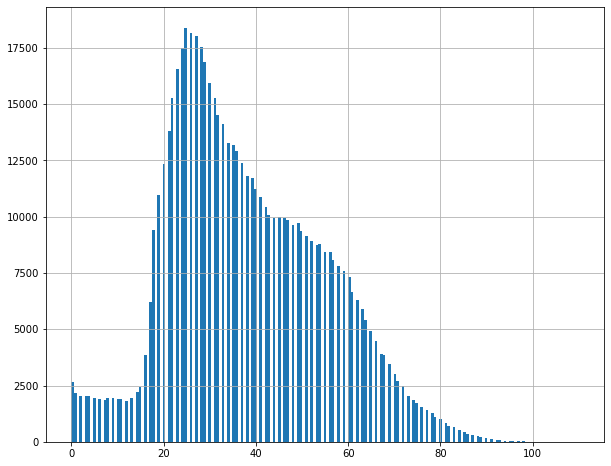

In [82]:
X_train[X_train.AGE >= 0].AGE.hist(figsize=(10, 8), bins='auto');

In [83]:
X_train[X_train.AGE == 0]

,PERSON_TYPE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR
819325,PEDESTRIAN,NaN,IL,M,0.0,NaN,USAGE UNKNOWN,NaN,NaN,UNKNOWN,...,NaN,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,1711.0,2.0,11,2,12,2019
870260,PASSENGER,6.0,IL,M,0.0,NaN,CHILD RESTRAINT USED,DID NOT DEPLOY,NONE,NaN,...,Y,$500 OR LESS,UNABLE TO DETERMINE,UNABLE TO DETERMINE,731.0,2.0,19,1,10,2015
59101,PASSENGER,6.0,IL,M,0.0,NaN,CHILD RESTRAINT - REAR FACING,DID NOT DEPLOY,NONE,NaN,...,NaN,"$501 - $1,500",FAILING TO YIELD RIGHT-OF-WAY,UNABLE TO DETERMINE,1124.0,2.0,9,4,6,2020
874412,PASSENGER,5.0,NaN,F,0.0,NaN,CHILD RESTRAINT USED,NOT APPLICABLE,NONE,NaN,...,NaN,"OVER $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1232.0,2.0,14,2,10,2018
117265,PASSENGER,6.0,WI,M,0.0,NaN,CHILD RESTRAINT USED,DID NOT DEPLOY,NONE,NaN,...,NaN,"$501 - $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,2412.0,2.0,15,4,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138551,PASSENGER,10.0,IL,F,0.0,NaN,CHILD RESTRAINT - TYPE UNKNOWN,DID NOT DEPLOY,NONE,NaN,...,NaN,"OVER $1,500",EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,724.0,1.0,16,5,4,2021
544836,PEDESTRIAN,NaN,IL,M,0.0,NaN,USAGE UNKNOWN,NaN,NaN,UNKNOWN,...,NaN,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,1922.0,2.0,17,6,9,2018
919272,PASSENGER,4.0,NaN,F,0.0,NaN,CHILD RESTRAINT - REAR FACING,DID NOT DEPLOY,NONE,NaN,...,NaN,$500 OR LESS,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,NOT APPLICABLE,2012.0,2.0,19,7,7,2019
146620,PASSENGER,3.0,IL,F,0.0,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NaN,...,NaN,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,2515.0,2.0,19,3,7,2020


In [84]:
# # Set all SEAT_NO = 1 if PERSON_TYPE = 'DRIVER'
# X_train['SEAT_NO'][X_train.PERSON_TYPE == 'DRIVER'] = 1

In [85]:
# X_train.loc[X_train['SEAT_NO'].isna()]['PERSON_TYPE'].value_counts()

In [86]:
# # Fill rest of NaN values in SEAT_NO with 0
# X_train['SEAT_NO'].fillna(value=0, inplace=True)

In [87]:
# X_train['SEAT_NO'].isna().sum()

In [88]:
X_train.loc[(X_train.AGE==0) & (X_train.PERSON_TYPE == 'DRIVER')]

,PERSON_TYPE,SEAT_NO,STATE,SEX,AGE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,CRASH_YEAR


In [89]:
def seat_no_transformer(df):
    '''
    Set all SEAT_NO = 1 if PERSON_TYPE = 'DRIVER'
    and fill the rest with 0.
    '''
    df.loc[(df.PERSON_TYPE == 'DRIVER'), 'SEAT_NO'] = 1
    df['SEAT_NO'].fillna(value=0, inplace=True)
    return df

In [90]:
# def age_transformer(df):
#     '''
#     Replace negative ages with NaN.
#     Replace drivers with age=0 with NaN.
#     '''
#     df.loc[df.AGE < 0, 'AGE'] = np.nan
#     df.loc[(df.AGE == 0) & (df.PERSON_TYPE == 'DRIVER'), 'AGE'] = np.nan
#     return df

In [91]:
# def speed_limit_transformer(df):
#     '''
#     Replace all speed limits that are not multiples
#     of 5 or that are 0 with null.
#     '''
#     df.loc[df.POSTED_SPEED_LIMIT == 0, 'POSTED_SPEED_LIMIT'] = np.nan
#     df.loc[(df.POSTED_SPEED_LIMIT % 5) != 0, 'POSTED_SPEED_LIMIT'] = np.nan
#     return df

In [92]:
def beat_transformer(df):
    '''
    Extract and encode as a string the district
    from BEAT_OF_OCCURRENCE.
    '''
    df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(str)
    df['BEAT_OF_OCCURRENCE'] = df['BEAT_OF_OCCURRENCE'].apply(lambda x: x[:-4])
    # df.drop('BEAT_OF_OCCURRENCE', axis=1, inplace=True)
    return df

In [93]:
def license_class_transformer(df):
    '''
    Bin all license classes into A, B, C, D, and OTHER
    '''
    dl_classes = ['A', 'B', 'C', 'D', np.nan]
    df.loc[df['DRIVERS_LICENSE_CLASS'].isin(dl_classes) == False, 'DRIVERS_LICENSE_CLASS'] = 'OTHER'
    return df

In [94]:
def to_float_transformer(df):
    '''
    Ensure all columns are float, not int.
    '''
    for col in [df.select_dtypes('int64').columns]:
        df[col] = df[col].astype('float64')
    return df

In [121]:
def fill_categories(df):
    '''
    Fill null values with given value for 
    unknown values in that column.
    Drop all remaining nulls.
    '''
    df.fillna({#'STATE':'XX', 
               # 'DRIVERS_LICENSE_STATE':'XX', # This col now dropped before train-test-split
               #'DRIVERS_LICENSE_CLASS': 'D', # Most common; D = 'normal' drivers license for cars
               'EJECTION': 'UNKNOWN',
               'DRIVER_ACTION': 'UNKNOWN',
               #'DRIVER_VISION': 'UNKNOWN',
               #'PHYSICAL_CONDITION': 'UNKNOWN',
               'SAFETY_EQUIPMENT': 'USAGE_UNKNOWN',
               'AIRBAG_DEPLOYED': 'DEPLOYMENT_UNKNOWN',
               'SEX': 'UNKNOWN',
               #'INTERSECTION_RELATED_I': 'N',
               #'HIT_AND_RUN_I': 'N',
               #'BAC_RESULT': 'TEST NOT OFFERED'
              }, inplace=True)
    return df

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe_cols = list(X_train_smaller.select_dtypes('object').columns)
ohe_cols.append('BEAT_OF_OCCURRENCE')

# OneHotEncode the columns as part of cleaning
# to avoid needing to separate numerical and categorical
# columns later
ohe_col_trans = ColumnTransformer(transformers=
                                     [('ohe', OneHotEncoder(drop='first', sparse=False), 
                                       ohe_cols)],
                                 remainder='passthrough')

# Apply all our cleaning functions, then finish with ohe
cleaning_pipeline = Pipeline(steps=[
    ('seat_no', FunctionTransformer(seat_no_transformer)),
#     ('age', FunctionTransformer(age_transformer)),
    ('beat', FunctionTransformer(beat_transformer)),
#     ('speed', FunctionTransformer(speed_limit_transformer)),
#     ('license', FunctionTransformer(license_class_transformer)),
    ('fill_cat', FunctionTransformer(fill_categories)),
    ('float', FunctionTransformer(to_float_transformer)),
    ('col_trains', ohe_col_trans)
])

In [97]:
X_train_clean = cleaning_pipeline.fit_transform(X_train)

/Users/jessemarkowitz/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/jessemarkowitz/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-92-41f05342683b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [98]:
X_train_clean.shape

(627054, 344)

In [99]:
# Get column/feature names from OHE
cleaning_pipeline.steps[-1][1].get_feature_names()

['ohe__x0_DRIVER',
 'ohe__x0_NON-CONTACT VEHICLE',
 'ohe__x0_NON-MOTOR VEHICLE',
 'ohe__x0_PASSENGER',
 'ohe__x0_PEDESTRIAN',
 'ohe__x1_AL',
 'ohe__x1_AR',
 'ohe__x1_AZ',
 'ohe__x1_CA',
 'ohe__x1_CO',
 'ohe__x1_CT',
 'ohe__x1_DC',
 'ohe__x1_DE',
 'ohe__x1_FL',
 'ohe__x1_GA',
 'ohe__x1_HI',
 'ohe__x1_IA',
 'ohe__x1_ID',
 'ohe__x1_IL',
 'ohe__x1_IN',
 'ohe__x1_KS',
 'ohe__x1_KY',
 'ohe__x1_LA',
 'ohe__x1_MA',
 'ohe__x1_MD',
 'ohe__x1_ME',
 'ohe__x1_MI',
 'ohe__x1_MN',
 'ohe__x1_MO',
 'ohe__x1_MS',
 'ohe__x1_MT',
 'ohe__x1_NB',
 'ohe__x1_NC',
 'ohe__x1_ND',
 'ohe__x1_NH',
 'ohe__x1_NJ',
 'ohe__x1_NM',
 'ohe__x1_NV',
 'ohe__x1_NY',
 'ohe__x1_OH',
 'ohe__x1_OK',
 'ohe__x1_OR',
 'ohe__x1_PA',
 'ohe__x1_RI',
 'ohe__x1_SC',
 'ohe__x1_SD',
 'ohe__x1_TN',
 'ohe__x1_TX',
 'ohe__x1_UT',
 'ohe__x1_VA',
 'ohe__x1_VT',
 'ohe__x1_WA',
 'ohe__x1_WI',
 'ohe__x1_WV',
 'ohe__x1_WY',
 'ohe__x1_XX',
 'ohe__x2_M',
 'ohe__x2_UNKNOWN',
 'ohe__x2_X',
 'ohe__x3_B',
 'ohe__x3_C',
 'ohe__x3_D',
 'ohe__x3_OTHER',
 

In [100]:
ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()

## Model pipeline w/scaling

After one-hot-encoding our categorical variables, we'll use SimpleImputer to fill in the missing values in `AGE` and `POSTED_SPEED_LIMIT`, then scale the data to ready for modeling.

In [101]:
# from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [104]:
# X_train_transformed_nums = X_train_transformed.select_dtypes(include=['float64', 'int64'])
# X_train_transformed_cat = X_train_transformed.select_dtypes('object')

# num_cols = X_train_transformed_nums.columns
# cat_cols = X_train_transformed_nums.columns

In [162]:
# numerical_pipeline = Pipeline(steps=[
#     ('simple', SimpleImputer(strategy='median', fill_value=0)),
#     ('ss', StandardScaler())
# ])
#
# categorical_pipeline = Pipeline(steps=[
#     ('ohe', OneHotEncoder(drop='first',
#                          sparse=False))
# ])

# transformer = ColumnTransformer(transformers=[
#     ('numerical', numerical_pipeline, X_train.select_dtypes(include=['float64', 'int64']).columns),
#     ('categorical', categorical_pipeline, X_train.select_dtypes('object').columns)
# ], remainder='passthrough')

Since now we have OHE as part of the cleaning pipeline, we can just put SimpleImputer and StandardScaler in our model pipline

In [91]:
model_pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('lr', LogisticRegression())
])

In [134]:
from sklearn.model_selection import cross_validate

def print_cv_scores(pipe):
    
    # we pass in pipe to cross validate along with a feature list.
    results = cross_validate(pipe, X_train_smaller_clean, 
                                   y_train, 
                                   return_train_score=True)
    
    print(results['train_score'])
    print(results['train_score'].mean())
    print('##############')
    print(results['test_score'])
    print(results['test_score'].mean())
    
# print_cv_scores(model_pipe)

In [93]:
model_pipe.fit(X_train_clean, y_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ss', StandardScaler()), ('lr', LogisticRegression())])

In [94]:
print('Training score: ', model_pipe.score(X_train_clean, y_train))

Training score:  0.9058837037958454


In [95]:
model_pipe.steps[1][1].coef_

array([[ 0.22456159,  0.03082208,  0.01053495, ...,  0.00453853,
        -0.01637645, -0.07232692],
       [-0.30969755,  0.00960488, -0.01072455, ..., -0.00327322,
         0.01762414,  0.03091023],
       [-0.08551055, -0.04177428, -0.00253961, ...,  0.01144324,
         0.01234129,  0.00291762],
       [ 0.1706465 ,  0.00134731,  0.0027292 , ..., -0.01270856,
        -0.01358898,  0.03849907]])

In [96]:
lr_coefs = model_pipe.steps[1][1].coef_

In [97]:
len(lr_coefs[0]) == len(ohe_feature_names)

True

In [98]:
def print_logreg_coefs(cleaning_pipeline, model_pipeline, thresh=0.05):
    ohe_feature_names = cleaning_pipeline.steps[-1][1].get_feature_names()
    lr_coefs = model_pipeline.steps[1][1].coef_
    
    for i in range(len(lr_coefs)):
        print('Coefs for features in class ', i)
        for j in range(len(ohe_feature_names)):
            if abs(lr_coefs[i][j] >= thresh):
                print(ohe_feature_names[j], ': ', lr_coefs[i][j])
        print('='*30, '\n')

In [99]:
print_logreg_coefs(cleaning_pipeline, model_pipe)

Coefs for features in class  0
ohe__x0_DRIVER :  0.2245615913216943
ohe__x0_PASSENGER :  0.2522282634781743
ohe__x2_M :  0.061515583583968476
ohe__x4_CHILD RESTRAINT - FORWARD FACING :  0.07618749141086764
ohe__x4_CHILD RESTRAINT - REAR FACING :  0.0570827566384372
ohe__x4_CHILD RESTRAINT - TYPE UNKNOWN :  0.051887017086316656
ohe__x4_CHILD RESTRAINT USED :  0.12088159714251152
ohe__x4_NONE PRESENT :  0.10175222009975625
ohe__x4_SAFETY BELT USED :  0.5783846616961548
ohe__x4_USAGE UNKNOWN :  0.44668008597733605
ohe__x5_DEPLOYMENT UNKNOWN :  0.19301295288587303
ohe__x5_DID NOT DEPLOY :  0.633055473894856
ohe__x5_NOT APPLICABLE :  0.4876384710742554
ohe__x7_FOLLOWED TOO CLOSELY :  0.06617724088382344
ohe__x7_IMPROPER PARKING :  0.10183201340207755
ohe__x9_FATIGUED/ASLEEP :  0.09242613004056648
ohe__x9_NORMAL :  0.26236385020370384
ohe__x11_STOP SIGN/FLASHER :  0.05631241347246261
ohe__x12_FUNCTIONING PROPERLY :  0.0684403333295484
ohe__x12_NO CONTROLS :  0.10119168883255743
ohe__x12_UNKN

In [109]:
X_train.columns

Index(['PERSON_TYPE', 'SEAT_NO', 'STATE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED',
       'EJECTION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'BAC_RESULT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR'],
      dtype='object')

## Using boosting estimators

**AdaBoost:**

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

In [143]:
abc = AdaBoostClassifier(random_state=42)
boost_scaler = StandardScaler()

adaboost_pipe = Pipeline(steps=[
    ('ss', boost_scaler),
    ('ada', abc)
])

In [144]:
adaboost_pipe.fit(X_train_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('ada', AdaBoostClassifier(random_state=42))])

In [230]:
adaboost_pipe.score(X_train_clean, y_train)

0.9053574333311006

## Cutting down features

The complexity/number of features we have is making it impossible to even run a model. We're going to cut down on features to reduce overall complexity, using the coefficient values from the earlier logistic regression model for predicting class 3 (aka 'FATAL') and by checking w/Angie's DecisionTreeClassifier model.

In [124]:
X_train_smaller = X_train[['PERSON_TYPE', 'SEX', 'SAFETY_EQUIPMENT', 'AGE', 'AIRBAG_DEPLOYED', 
                           'EJECTION', 'DRIVER_ACTION', 'SEAT_NO', 'LIGHTING_CONDITION', 'WEATHER_CONDITION', 
                           'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
                           'BEAT_OF_OCCURRENCE', 'NUM_UNITS']]
X_train_smaller.head()

,PERSON_TYPE,SEX,SAFETY_EQUIPMENT,AGE,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,SEAT_NO,LIGHTING_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,BEAT_OF_OCCURRENCE,NUM_UNITS
630683,DRIVER,M,USAGE UNKNOWN,24.0,DID NOT DEPLOY,NONE,NONE,1.0,DAYLIGHT,SNOW,REAR END,NOT DIVIDED,"$501 - $1,500",FOLLOWING TOO CLOSELY,6,2.0
526739,DRIVER,M,SAFETY BELT USED,19.0,DID NOT DEPLOY,NONE,OTHER,1.0,DAYLIGHT,CLEAR,REAR END,NOT DIVIDED,"OVER $1,500",FOLLOWING TOO CLOSELY,8,2.0
396639,DRIVER,F,NONE PRESENT,32.0,DID NOT DEPLOY,NONE,FOLLOWED TOO CLOSELY,1.0,DAYLIGHT,CLEAR,REAR END,NOT DIVIDED,"OVER $1,500",FOLLOWING TOO CLOSELY,1,2.0
601015,DRIVER,F,USAGE UNKNOWN,31.0,DID NOT DEPLOY,NONE,NONE,1.0,"DARKNESS, LIGHTED ROAD",CLEAR,FIXED OBJECT,DIVIDED - W/MEDIAN (NOT RAISED),"OVER $1,500",ROAD ENGINEERING/SURFACE/MARKING DEFECTS,16,1.0
243232,DRIVER,F,USAGE UNKNOWN,27.0,DID NOT DEPLOY,NONE,UNKNOWN,1.0,UNKNOWN,UNKNOWN,TURNING,CENTER TURN LANE,"OVER $1,500",UNABLE TO DETERMINE,22,2.0


In [125]:
len(X_train_smaller.columns)

16

In [126]:
X_train_smaller_clean = cleaning_pipeline.fit_transform(X_train_smaller)

/Users/jessemarkowitz/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/jessemarkowitz/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-92-41f05342683b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

**GradBoost:**

In [127]:
gradboost = GradientBoostingClassifier(random_state=42)
gradboost_scaler = StandardScaler()

gradboost_pipe = Pipeline(steps=[
    ('ss', gradboost_scaler),
    ('grad', gradboost)
])

In [128]:
gradboost_pipe.fit(X_train_smaller_clean, y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('grad', GradientBoostingClassifier(random_state=42))])

In [135]:
gradboost_pipe.score(X_train_smaller_clean, y_train)

0.9052298526123747

In [137]:
print_cv_scores(gradboost_pipe)

KeyboardInterrupt: 

In [ ]:
gradboost_param_grid = {
    'grad__n_estimators': [50, 100, 500, 1000], 
    'grad__'}

## Independent Iteration

To save on time, I'm just going to run parts of the pipeline separately. The goal is to have a fully cleaned, imputed, and one-hot-encoded version of `X_train` to then run easily in a cross-val pipeline.

In [157]:
# Use cleaning_pipline to clean up the values
X_train_transformed = cleaning_pipeline.fit_transform(X_train)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [160]:
X_train_transformed.isna().sum()

PERSON_TYPE                     0
SEAT_NO                         0
STATE                           0
SEX                             0
AGE                        262506
DRIVERS_LICENSE_CLASS           0
SAFETY_EQUIPMENT                0
AIRBAG_DEPLOYED                 0
EJECTION                        0
DRIVER_ACTION                   0
DRIVER_VISION                   0
PHYSICAL_CONDITION              0
BAC_RESULT                      0
POSTED_SPEED_LIMIT          10801
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I          0
HIT_AND_RUN_I                   0
DAMAGE                          0
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
BEAT_OF_OCCURR

In [175]:
# Impute missing values for AGE and POSTED_SPEED_LIMIT
cat_ind = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first', sparse=False), X_train_transformed.select_dtypes('object').columns)
], remainder='passthrough')

X_train_trans_imp = cat_ind.fit_transform(X_train_transformed)

In [177]:
# Create a pipeline to use with cross_validate
ind_model_pipe = Pipeline(steps=[
    ('simple', SimpleImputer(strategy='median', fill_value=0)),
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

In [179]:
print_cv_scores(ind_model_pipe)

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

[0.93272265 0.93275889 0.93260417 0.9327798  0.93273798]
0.9327206989217338
##############
[0.93188635 0.93233795 0.93295124 0.93243831 0.93275053]
0.9324728760830053
